In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
X_test = X_test/255

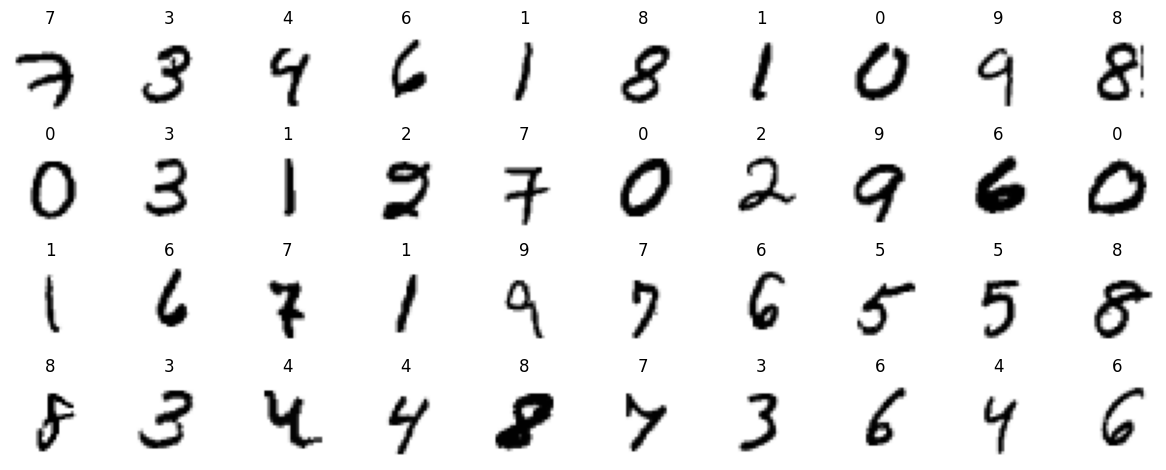

In [7]:
n_col = 10
n_row = 4

plt.figure(figsize=(n_col*1.2, n_row * 1.2))
for row in range(n_row):
  for col in range(n_col):
    index = row * n_col + col
    plt.subplot(n_row, n_col, index + 1)
    plt.imshow(X_train[index], cmap = "binary")
    plt.title(y_train[index])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
unique_label = np.unique(y_train)
unique_label

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
n_label = len(unique_label)
n_label

10

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= [28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(n_label, activation='softmax')
])

In [57]:
class ExponentialLeanringRate(tf.keras.callbacks.Callback):
  def __init__(self, factor):
    self.factor = factor
    self.losses = []
    self.rates = []

  def on_batch_end(self, batch, logs = None):
    lr = self.model.optimizer.learning_rate.numpy() * self.factor
    self.model.optimizer.learning_rate = lr
    self.rates.append(lr)
    self.losses.append(logs['loss'])

  def plot(self):
    plt.plot(self.rates, self.losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(self.losses), min(self.rates), max(self.rates))
    plt.axis([min(self.rates), max(self.rates), 0, self.losses[0]])
    plt.grid()
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [58]:
expon_lr = ExponentialLeanringRate(factor = 1.005)

In [59]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer,metrics = ['accuracy'])

In [60]:
batch_size = 32
epochs = 1

In [61]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs,validation_data=(X_valid,y_valid), callbacks=[expon_lr])

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6989 - loss: 0.9105 - val_accuracy: 0.0990 - val_loss: 3.5557


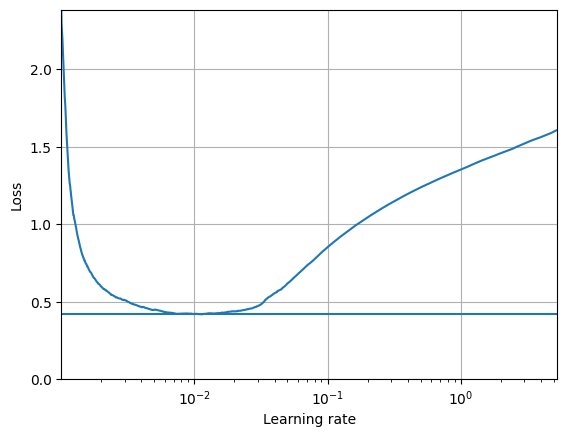

In [62]:
expon_lr.plot()

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= [28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(n_label, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
check_point = tf.keras.callbacks.ModelCheckpoint("bestModel.keras", save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 20)

In [25]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.25)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [27]:
batch_size = 32
epochs = 100

In [28]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs,validation_data=(X_valid,y_valid), callbacks=[check_point, early_stopping])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1020 - loss: 2.3356 - val_accuracy: 0.1126 - val_loss: 2.3110
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1019 - loss: 2.4845 - val_accuracy: 0.0868 - val_loss: 2.3324
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1027 - loss: 2.3364 - val_accuracy: 0.1100 - val_loss: 2.3366
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1030 - loss: 2.3395 - val_accuracy: 0.1002 - val_loss: 2.3123
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0999 - loss: 2.3345 - val_accuracy: 0.0986 - val_loss: 2.3112
Epoch 6/100
 571/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0995 - loss: 2.3386

KeyboardInterrupt: 

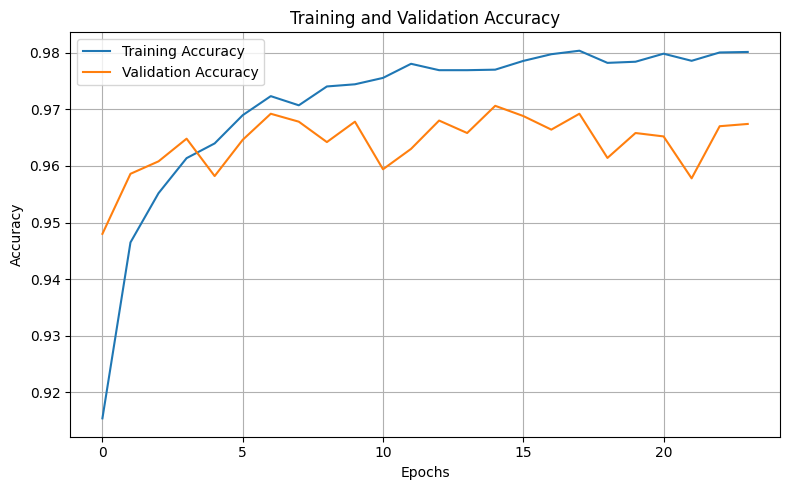

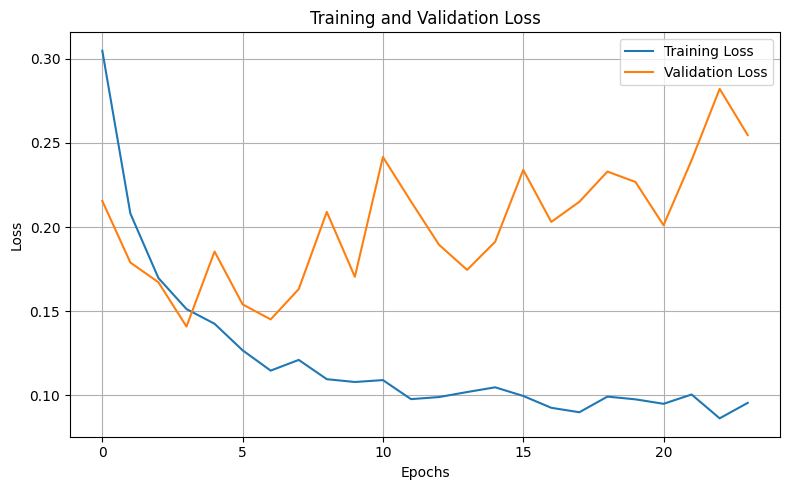

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))  # hoặc range(1, len(acc) + 1)

# --- Vẽ biểu đồ Accuracy ---
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Vẽ biểu đồ Loss ---
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
model = tf.keras.models.load_model("bestModel.keras")
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9569 - loss: 0.3498


[0.2986941635608673, 0.963100016117096]